In [1]:
suppressPackageStartupMessages({ 
    library(data.table) 
    library(dplyr) 
    library(ggplot2) 
    library(SingleCellExperiment)
    library(dplyr)
    library(celldex)
    library(SingleR)
    library(RColorBrewer)
    library(scater) 
    library(StabMap) 
    library(scran) 
    library(harmony) 
    library(patchwork)
    library(Seurat)
    library(plotly)
    library(pheatmap)
    library(batchelor)
    library(ggpubr)
    library(cowplot)
    library(viridis)
})

## List of Cell Types

In [2]:
#############################
######### MESODERM ##########
#############################

## list mesoderm posterior --> anterior along the primitive streak

Early_gastrula <- c("ExE ectoderm",
                    "Epiblast",
                    "Caudal epiblast",
                    "Primitive Streak",
                    "Nascent mesoderm",
                    "PGC")

yolksac_blood <- c("Haematoendothelial progenitors", 
                   "EMP", 
                   "MEP", 
                   "Megakaryocyte progenitors", 
                   "Blood progenitors", 
                   "Erythroid", 
                   "Chorioallantoic-derived erythroid progenitors")

endo <- c("YS endothelium",
          "Venous endothelium",
          "Embryo proper endothelium",
          "Allantois endothelium")
    
yolksac_other <- c("YS mesothelium-derived endothelial progenitors",
                   "YS mesothelium")

mesenchymal <- c("Embryo proper mesothelium",
                 "Mesenchyme")                   
                
allantois <- c("Allantois endothelium", 
               "Allantois")


In [3]:
#############################
######### MESODERM ##########
#############################

## list mesoderm posterior --> anterior along the primitive streak

Early_gastrula <- c("Primitive Streak",
                    "Nascent mesoderm",
                    "PGC")

yolksac_blood <- c("Haematoendothelial progenitors", 
                   "EMP", 
                   "MEP", 
                   "Megakaryocyte progenitors", 
                   "Blood progenitors", 
                   "Erythroid", 
                   "Chorioallantoic-derived erythroid progenitors")

endo <- c("YS endothelium",
          "Venous endothelium",
          "Embryo proper endothelium",
          "Allantois endothelium")
    
yolksac_other <- c("YS mesothelium-derived endothelial progenitors",
                   "YS mesothelium")

yolksac_other_2 <- c("YS mesothelium-derived endothelial progenitors"
                   #"YS mesothelium"
                     )

mesenchymal <- c("Embryo proper mesothelium",
                 "Mesenchyme")                   
                
allantois <- c("Allantois" 
               #"Allantois endothelium"
              )

ExE_mesoderm <- c(yolksac_blood, endo, yolksac_other, mesenchymal, allantois) 

Cranial_mesoderm <- c("Cranial mesoderm")

Cardiac_mesoderm <- c("Pharyngeal mesoderm",
                  "Cardiopharyngeal progenitors",
                  "Cardiopharyngeal progenitors SHF",
                  "Anterior cardiopharyngeal progenitors",
                  "Cardiopharyngeal progenitors FHF",
                  "Cardiomyocytes FHF 1",
                  "Cardiomyocytes FHF 2",
                  "Cardiomyocytes SHF 1",
                  "Cardiomyocytes SHF 2",
                  "Epicardium",
                  "Endocardium")

Lateral_plate_mesoderm <- c("Lateral plate mesoderm",
                           "Limb mesoderm",
                           "Forelimb")

Intermediate_mesoderm <- c("Intermediate mesoderm", "Kidney primordium")

Paraxial_mesoderm <- c("Paraxial mesoderm", 
                  "Presomitic mesoderm", 
                  "Somitic mesoderm",
                  "Anterior somitic tissues",
                  "Posterior somitic tissues",
                  "Dermomyotome", 
                  "Endotome", 
                  "Sclerotome")

Axial_mesoderm <- c("Caudal mesoderm", 
                  "NMPs", 
                  "NMPs/Mesoderm-biased",
                  "Node",
                  "Notochord")
                       
Frontonasal_mesenchyme <- c("Frontonasal mesenchyme")

mesoderm_list <- c(Early_gastrula,
                   ExE_mesoderm, 
                   Cranial_mesoderm, 
                   Cardiac_mesoderm, 
                   Lateral_plate_mesoderm, 
                   Intermediate_mesoderm, 
                   Paraxial_mesoderm, 
                   Axial_mesoderm,
                   Frontonasal_mesenchyme)

non_ExE_mesoderm_list <- c(Early_gastrula,
                   Cranial_mesoderm, 
                   Cardiac_mesoderm, 
                   Lateral_plate_mesoderm, 
                   Intermediate_mesoderm, 
                   Paraxial_mesoderm, 
                   Axial_mesoderm,
                   Frontonasal_mesenchyme)

cardiac_somitic_mesoderm_list <- c(Cranial_mesoderm, 
                   Cardiac_mesoderm, 
                   Lateral_plate_mesoderm, 
                   Intermediate_mesoderm, 
                   Paraxial_mesoderm, 
                   Axial_mesoderm,
                   Frontonasal_mesenchyme)

hemato_endo <- c(yolksac_blood, 
                   endo, 
                   yolksac_other_2, 
                   allantois)

In [4]:
str(mesoderm_list)

 chr [1:50] "Primitive Streak" "Nascent mesoderm" "PGC" ...


In [5]:
#############################
######### ECTODERM ##########
#############################

Surface_ectoderm <- c("Amniotic ectoderm",
                  "Surface ectoderm",
                  "Epidermis",
                  "Placodal ectoderm",
                  "Otic placode",
                  "Otic neural progenitors",
                  "Limb ectoderm")

# list A --> P + D --> V
Neural_tube <- c("Neural tube",
                "Optic vesicle",
                "Early dorsal forebrain progenitors",
                "Late dorsal forebrain progenitors",
                "Ventral forebrain progenitors",
                "Midbrain progenitors",
                "Dorsal midbrain neurons",
                "Midbrain/Hindbrain boundary",
                "Dorsal hindbrain progenitors", 
                "Hindbrain floor plate",
                "Hindbrain neural progenitors",
                "Ventral hindbrain progenitors",
                "Dorsal spinal cord progenitors",
                "Spinal cord progenitors")

Neural_crest <- c("Migratory neural crest",
                "Branchial arch neural crest")

extra_ectoderm <- c("Ectoderm", "Non-neural ectoderm")

ectoderm_list <- c(Surface_ectoderm, Neural_tube, Neural_crest, extra_ectoderm, "Epiblast", "Caudal epiblast")



In [6]:
#############################
######### ENDODERM ##########
#############################
## list endoderm early --> late, anterior --> posterior 

Primitive_endoderm <- c("Parietal endoderm", 
                     "ExE endoderm",
                     "Visceral endoderm")

Definitive_endoderm <- c("Anterior Primitive Streak",
                 "Gut tube",
                 "Foregut",
                 "Midgut",
                 "Hindgut",
                 "Pharyngeal endoderm",
                 "Thyroid primordium")

endoderm_list <- c(Definitive_endoderm, Primitive_endoderm)

In [7]:
str(ectoderm_list)

 chr [1:27] "Amniotic ectoderm" "Surface ectoderm" "Epidermis" ...


In [8]:
all_germlayer_list <- c(ectoderm_list, mesoderm_list, endoderm_list)

str(all_germlayer_list)

 chr [1:87] "Amniotic ectoderm" "Surface ectoderm" "Epidermis" ...


In [9]:
all_cells <- c("Allantois", "Allantois endothelium", "Amniotic ectoderm", "Anterior cardiopharyngeal progenitors",
               "Anterior Primitive Streak", "Anterior somitic tissues", "Blood progenitors",
               "Branchial arch neural crest", "Cardiomyocytes FHF 1", "Cardiomyocytes FHF 2", "Cardiomyocytes SHF 1",
               "Cardiomyocytes SHF 2", "Cardiopharyngeal progenitors", "Cardiopharyngeal progenitors FHF",
               "Cardiopharyngeal progenitors SHF", "Caudal epiblast", "Caudal mesoderm",
               "Chorioallantoic-derived erythroid progenitors", "Cranial mesoderm", "Dermomyotome",
               "Dorsal hindbrain progenitors", "Dorsal midbrain neurons", "Dorsal spinal cord progenitors",
               "Early dorsal forebrain progenitors", "Ectoderm", "Embryo proper endothelium",
               "Embryo proper mesothelium", "EMP", "Endocardium", "Endotome", "Epiblast", "Epicardium", "Epidermis",
               "Erythroid", "ExE ectoderm", "ExE endoderm", "Foregut", "Forelimb", "Frontonasal mesenchyme",
               "Gut tube", "Haematoendothelial progenitors", "Hindbrain floor plate", "Hindbrain neural progenitors",
               "Hindgut", "Intermediate mesoderm", "Kidney primordium", "Late dorsal forebrain progenitors",
               "Lateral plate mesoderm", "Limb ectoderm", "Limb mesoderm", "Megakaryocyte progenitors", "MEP",
               "Mesenchyme", "Midbrain progenitors", "Midbrain/Hindbrain boundary", "Midgut", "Migratory neural crest",
               "Nascent mesoderm", "Neural tube", "NMPs", "NMPs/Mesoderm-biased", "Node", "Non-neural ectoderm",
               "Notochord", "Optic vesicle", "Otic neural progenitors", "Otic placode", "Paraxial mesoderm",
               "Parietal endoderm", "PGC", "Pharyngeal endoderm", "Pharyngeal mesoderm", "Placodal ectoderm",
               "Posterior somitic tissues", "Presomitic mesoderm", "Primitive Streak", "Sclerotome", "Somitic mesoderm",
               "Spinal cord progenitors", "Surface ectoderm", "Thyroid primordium", "Venous endothelium",
               "Ventral forebrain progenitors", "Ventral hindbrain progenitors", "Visceral endoderm",
               "YS endothelium", "YS mesothelium", "YS mesothelium-derived endothelial progenitors")

In [10]:
str(all_cells)

 chr [1:88] "Allantois" "Allantois endothelium" "Amniotic ectoderm" ...


In [11]:
# Split the character vector into four smaller vectors
split_size <- 22
char_vector_1 <- all_cells[1:split_size]
char_vector_2 <- all_cells[(split_size + 1):(2 * split_size)]
char_vector_3 <- all_cells[(2 * split_size + 1):(3 * split_size)]
char_vector_4 <- all_cells[(3 * split_size + 1):length(all_cells)]

# Print the smaller vectors
print(char_vector_1)
print(char_vector_2)
print(char_vector_3)
print(char_vector_4)

 [1] "Allantois"                                    
 [2] "Allantois endothelium"                        
 [3] "Amniotic ectoderm"                            
 [4] "Anterior cardiopharyngeal progenitors"        
 [5] "Anterior Primitive Streak"                    
 [6] "Anterior somitic tissues"                     
 [7] "Blood progenitors"                            
 [8] "Branchial arch neural crest"                  
 [9] "Cardiomyocytes FHF 1"                         
[10] "Cardiomyocytes FHF 2"                         
[11] "Cardiomyocytes SHF 1"                         
[12] "Cardiomyocytes SHF 2"                         
[13] "Cardiopharyngeal progenitors"                 
[14] "Cardiopharyngeal progenitors FHF"             
[15] "Cardiopharyngeal progenitors SHF"             
[16] "Caudal epiblast"                              
[17] "Caudal mesoderm"                              
[18] "Chorioallantoic-derived erythroid progenitors"
[19] "Cranial mesoderm"                       

In [12]:
not_in_both <- setdiff(unique(c(all_cells, all_germlayer_list)), intersect(all_cells, all_germlayer_list))

# Display the names that do not appear in both lists
print(not_in_both)

[1] "ExE ectoderm"


## Celltype Colours

In [13]:
embryo_colors <- c(
  "embryo_1" = "#1f78b4",  # shades of blue
  "embryo_2" = "#a6cee3",  # shades of blue
  "embryo_3" = "#33a02c",  # shades of green
  "embryo_4" = "#b2df8a",  # shades of green
  "embryo_5" = "#ff7f00",  # shades of orange
  "embryo_6" = "#fdbf6f",  # shades of orange
  "embryo_7" = "#ffcc00"   # shades of orange
)


In [14]:
seurat_colors <- c(
  "0" = "#F6BF1A",
  "1" = "#C6AB8C",
  "2" = "#8b5c57",
  "3" = "#574b3c",
  "4" = "#b48e5f",
  "5" = "#E98EB8",
  "6" = "#ff00b2",
  "7" = "#ffadff",
  "8" = "#83caff",
  "9" = "#7b98b9",
  "10" = "#B983A7",
  "11" = "#0f7f7f",
  "12" = "#357B95",
  "13" = "#F1D5E4",
  "14" = "#d44b75",
  "15" = "#c0196a",
  "16" = "#d04c3d",
  "17" = "#436bae",
  "18" = "#004d7a",
  "19" = "#51c7e7",
  "20" = "#82A4B6",
  "21" = "#3e8c31",
  "22" = "#d1eb49",
  "23" = "#dfc735",
  "24" = "#00A9AE",
  "25" = "#A8E7FA",
  "26" = "#4e6386",
  "27" = "#5b3da4",
  "28" = "#452971",
  "29" = "#b68021",
  "30" = "#ff6d8b",
  "31" = "#f67a6f",
  "32" = "#ff3573",
  "33" = "#cf5a8d",
  "34" = "#913d6c",
  "35" = "#A3177D",
  "36" = "#41677e",
  "37" = "#4c5bbc",
  "38" = "#2b275d",
  "39" = "#F99E75",
  "40" = "#6e5657",
  "41" = "#41677e",
  "42" = "#4c5bbc",
  "43" = "#2b275d",
  "44" = "#F99E75",
  "45" = "#6e5657",
  "46" = "#BB221F",
  "47" = "#D30000",
  "48" = "#d7be33",
  "49" = "#E63D1C",
  "50" = "#732336",
  "51" = "#ff7a37",
  "52" = "#9F3A3A",
  "53" = "#233c50",
  "54" = "#7fc6a4",
  "55" = "#ad2e00",
  "56" = "#8c003d",
  "57" = "#7baae9",
  "58" = "#81B28C",
  "59" = "#ff5a52",
  "60" = "#aa7400",
  "61" = "#8aaf74",
  "62" = "#13635c",
  "63" = "#728d48",
  "64" = "#7e9ea2",
  "65" = "#89cf6b",
  "66" = "#17d659",
  "67" = "#6c7b68",
  "68" = "#265b29",
  "69" = "#a98591",
  "70" = "#4e9e3e",
  "71" = "#1e3021",
  "72" = "#3f5b86",
  "73" = "#a36c8f",
  "74" = "#bd9292",
  "75" = "#5f1a2f",
  "76" = "#d773c9",
  "77" = "#f3f3b0",
  "78" = "#fbff80",
  "79" = "#fff851",
  "80" = "#ffc737",
  "81" = "#d29e00",
  "82" = "#ff5700",
  "83" = "#e79450",
  "84" = "#00a000",
  "85" = "#F5ADBB",
  "86" = "#706169",
  "87" = "#7c7c7c",
  "88" = "#333333"
)


In [15]:
seurat_colors <- c(
 "0" = "#FACB12",
  "1" = "#DABE99",
  "2" = "#9e6762",
  "3" = "#635547",
  "4" = "#c19f70",
  "5" = "#F397C0",
  "6" = "#ff00b2",
  "7" = "#ffb7ff",
  "8" = "#95e1ff",
  "9" = "#97bad3",
  "10" = "#C594BF",
  "11" = "#139992",
  "12" = "#3F84AA",
  "13" = "#F9DFE6",
  "14" = "#e35f82",
  "15" = "#d02d75",
  "16" = "#e85639",
  "17" = "#5581ca",
  "18" = "#005579",
  "19" = "#5adbe4",
  "20" = "#8DB5CE",
  "21" = "#456722",
  "22" = "#d5e839",
  "23" = "#e3cb3a",
  "24" = "#00BFC4",
  "25" = "#C9EBFB",
  "26" = "#556789",
  "27" = "#683ed8",
  "28" = "#532C8A",
  "29" = "#cc7818",
  "30" = "#ff7f9c",
  "31" = "#f79083",
  "32" = "#ff487d",
  "33" = "#d780b0",
  "34" = "#a64d7e",
  "35" = "#B51D8D",
  "36" = "#4b7193",
  "37" = "#5d70dc",
  "38" = "#332c6c",
  "39" = "#FBBE92",
  "40" = "#6c4b4c",
  "41" = "#4b7193",
  "42" = "#5d70dc",
  "43" = "#332c6c",
  "44" = "#FBBE92",
  "45" = "#6c4b4c",
  "46" = "#C72228",
  "47" = "#E50000",
  "48" = "#e3cb3a",
  "49" = "#EF4E22",
  "50" = "#7c2a47",
  "51" = "#ff891c",
  "52" = "#AE3F3F",
  "53" = "#2f4a60",
  "54" = "#90e3bf",
  "55" = "#bd3400",
  "56" = "#9d0049",
  "57" = "#89c1f5",
  "58" = "#8EC792",
  "59" = "#ff675c",
  "60" = "#bd7300",
  "61" = "#a0b689",
  "62" = "#0f8073",
  "63" = "#7a9941",
  "64" = "#8ab3b5",
  "65" = "#9bf981",
  "66" = "#12ed4c",
  "67" = "#7e907a",
  "68" = "#2c6521",
  "69" = "#bf9da8",
  "70" = "#59b545",
  "71" = "#233629",
  "72" = "#4a6798",
  "73" = "#bd84b0",
  "74" = "#d3b1b1",
  "75" = "#6b2035",
  "76" = "#e273d6",
  "77" = "#f7f79e",
  "78" = "#fcff00",
  "79" = "#fff335",
  "80" = "#ffd731",
  "81" = "#dbb400",
  "82" = "#ff5c00",
  "83" = "#f1a262",
  "84" = "#00b000",
  "85" = "#F6BFCB",
  "86" = "#7F6874",
  "87" = "#989898",
  "88" = "#1A1A1A"
)

In [16]:
stages_colors = c(
"E6.5" = "#F21A00",
"E6.75" = "#EC4B00",
"E7.0" = "#E67D00",
"E7.25" = "#E1AF00",
"E7.5" = "#E4B80E",
"E7.75"="#E7C21C",
"E8.0" = "#EBCC2A",
"E8.25" = "#C4C55D",
"E8.5" = "#9EBE91",
"E8.75" = "#78B7C5",
"E9.0" = "#3399FF",
"E9.25"="#297ACC",
"E9.5"="#2162A3",
"Mixed gastrulation" = "#BEBEBE")

In [17]:
anatomy_colors = c(
"EP" = "#000000",
"YS" = "#5E4FA2",
"Anterior section" = "#774611",
"Posterior section" = "#A2D630",
"Medial section" = "#D95F02",
"Posterior"="#E2C207",
"Anterior" = "#F71616",
"Pooled" = "#BEBEBE",
"NA" = "#BEBEBE")

In [18]:
original.colors = c(
  "Epiblast" = "#635547",
  "Primitive Streak" = "#DABE99",
  "Anterior Primitive Streak" = "#c19f70",
  "Caudal epiblast" = "#9e6762",
  "PGC" = "#FACB12",
  "Anterior Primitive_Streak" = "#c19f70",
  "Notochord" = "#0F4A9C",
  "Def. endoderm" = "#F397C0",
  "Gut" = "#EF5A9D",
  "Nascent mesoderm" = "#C594BF",
  "Mixed mesoderm" = "#DFCDE4",
  "Intermediate mesoderm" = "#139992",
  "Caudal Mesoderm" = "#3F84AA",
  "Paraxial mesoderm" = "#8DB5CE",
  "Somitic mesoderm" = "#005579",
  "Pharyngeal mesoderm" = "#C9EBFB",
  "Cardiomyocytes" = "#B51D8D",
  "Allantois" = "#532C8A",
  "ExE mesoderm" = "#8870ad",
  "Mesenchyme" = "#cc7818",
  "Haematoendothelial progenitors" = "#FBBE92",
  "Endothelium" = "#ff891c",
  "Blood progenitors" = "#c9a997",
  "Blood progenitors 1" = "#f9decf",
  "Blood progenitors 2" = "#c9a997",
  "Erythroid" = "#EF4E22",
  "Erythroid1" = "#C72228",
  "Erythroid2" = "#f79083",
  "Erythroid3" = "#EF4E22",
  "NMP" = "#8EC792",
  "Neurectoderm" = "#65A83E",
  "Rostral neurectoderm" = "#65A83E",
  "Caudal neurectoderm" = "#354E23",
  "Neural crest" = "#C3C388",
  "Forebrain Midbrain_Hindbrain" = "#647a4f",
  "Spinal cord" = "#CDE088",
  "Surface ectoderm" = "#f7f79e",
  "Visceral endoderm" = "#F6BFCB",
  "ExE endoderm" = "#7F6874",
  "ExE ectoderm" = "#989898",
  "Parietal endoderm" = "#1A1A1A"
)

In [19]:
extended.colors = c(
"Epiblast" = "#635547",
"Epiblast_0" = "#635547",
"Epiblast_1" = "#FACB12",
"Primitive Streak" = "#DABE99",
"Caudal epiblast" = "#9e6762",
"PGC" = "#FACB12",
"Anterior Primitive Streak" = "#c19f70",
"Node"="#153b3d",
"Notochord" = "#0F4A9C",
"Gut tube" = "#EF5A9D",
"Hindgut" = "#F397C0",
"Midgut" = "#ff00b2",
"Foregut" = "#ffb7ff",
"Pharyngeal endoderm"="#95e1ff",
"Thyroid primordium"="#97bad3",
"Nascent mesoderm" = "#C594BF",
"Intermediate mesoderm" = "#139992",
"Caudal mesoderm" = "#3F84AA",
"Lateral plate mesoderm" = "#F9DFE6",
"Limb mesoderm" = "#e35f82",
"Forelimb" = "#d02d75",
"Kidney primordium" = "#e85639",
"Presomitic mesoderm"="#5581ca",#"#0000ff",#blue
"Somitic mesoderm" = "#005579",
"Posterior somitic tissues" = "#5adbe4",#"#40e0d0",#turquoise
"Paraxial mesoderm" = "#8DB5CE",
"Cranial mesoderm" = "#456722",#"#006400",#darkgreen
"Anterior somitic tissues"= "#d5e839",
"Sclerotome" = "#e3cb3a",#"#ffff00",#yellow
"Dermomyotome" = "#00BFC4",#"#a52a2a",#brown
"Pharyngeal mesoderm" = "#C9EBFB",
"Cardiopharyngeal progenitors" = "#556789",
"Anterior cardiopharyngeal progenitors"="#683ed8",
"Allantois" = "#532C8A",
"Mesenchyme" = "#cc7818",
"YS mesothelium" = "#ff7f9c",
"Epicardium"="#f79083",
"Embryo proper mesothelium" = "#ff487d",
"Cardiopharyngeal progenitors FHF"="#d780b0",
"Cardiomyocytes FHF 1"="#a64d7e",
"Cardiomyocytes FHF 2"="#B51D8D",
"Cardiopharyngeal progenitors SHF"="#4b7193",
"Cardiomyocytes SHF 1"="#5d70dc",
"Cardiomyocytes SHF 2"="#332c6c",
"Haematoendothelial progenitors" = "#FBBE92",
"Blood progenitors" = "#6c4b4c",
"Erythroid" = "#C72228",
"Chorioallantoic-derived erythroid progenitors"="#E50000",
"Megakaryocyte progenitors"="#e3cb3a",
"MEP"="#EF4E22",
"EMP"="#7c2a47",
"YS endothelium"="#ff891c",
"YS mesothelium-derived endothelial progenitors"="#AE3F3F",
"Allantois endothelium"="#2f4a60",
"Embryo proper endothelium"="#90e3bf",
"Venous endothelium"="#bd3400",
"Endocardium"="#9d0049",
"NMPs/Mesoderm-biased" = "#89c1f5",
"NMPs" = "#8EC792",
"Ectoderm" = "#ff675c",
"Optic vesicle" = "#bd7300",
"Ventral forebrain progenitors"="#a0b689",
"Early dorsal forebrain progenitors"="#0f8073",
"Late dorsal forebrain progenitors"="#7a9941",
"Midbrain/Hindbrain boundary"="#8ab3b5",
"Midbrain progenitors"="#9bf981",
"Dorsal midbrain neurons"="#12ed4c",
"Ventral hindbrain progenitors"="#7e907a",
"Dorsal hindbrain progenitors"="#2c6521",
"Hindbrain floor plate"="#bf9da8",
"Hindbrain neural progenitors"="#59b545",
"Neural tube"="#233629",
"Migratory neural crest"="#4a6798",
"Branchial arch neural crest"="#bd84b0",
"Frontonasal mesenchyme"="#d3b1b1",
"Spinal cord progenitors"="#6b2035",
"Dorsal spinal cord progenitors"="#e273d6",
"Non-neural ectoderm" = "#f7f79e",
"Surface ectoderm" = "#fcff00",
"Epidermis" = "#fff335",
"Limb ectoderm" = "#ffd731",
"Amniotic ectoderm" = "#dbb400",
"Placodal ectoderm" = "#ff5c00",
"Otic placode"="#f1a262",
"Otic neural progenitors"="#00b000",
"Visceral endoderm" = "#F6BFCB",
"ExE endoderm" = "#7F6874",
"ExE ectoderm" = "#989898",
"Parietal endoderm" = "#1A1A1A"
)

## Data Locations

In [21]:
##### Load in Seurat Objects for post QC analyses #####

io = list()
io$main = "/rds/project/rds-SDzz0CATGms/users/ltgh2" # this is the main directory

# Set the working directory
setwd(io$main)

io$atlas = file.path(io$main, "projects/03_seqFISH_FINAL/code/extended_atlas_integration/processed_downsampled/downsample_10K_within_timpoint_all_stages.Rds")
io$seqFISH = file.path(io$main, "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_after_QC_filtering_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds") 

##### Load in StabMAP_Outputs #####
io$StabMAP_reweighted_MNNcorrected_original_counts_without_neigh = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_original_counts_without_neigh.Rds")
io$StabMAP_reweighted_MNNcorrected_integrated_counts_without_neigh = file.path(io$main, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_integrated_counts_without_neigh.Rds")

## Load in the seqFISH CellType Labels
io$seqFISH_labels = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_label_transfer/output/StabMAP_all_stages_post_QC_reweighted_MNNcorrected_original_counts_without_neigh_LABELS.Rds")

## Load in the seqFISH Imputed Gene Expression
io$seqFISH_imputed_logcounts_e6 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e6_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e7 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e7_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e8_1 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e8_embryo1_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e8_2 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e8_embryo2_postQC_imputed_RNA.Rds")

io$seqFISH_imputed_logcounts_e8_3 = file.path(io$main, 
                              "projects/03_seqFISH_FINAL/code/stabmap_imputation/output/seqFISH_e8_embryo3_postQC_imputed_RNA.Rds")

## Load in the seqFISH UMAP coordinates
io$UMAP_coordinates = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/stab_map_umap_generation/processed/StabMAP_allstage_postQC_MNNoriginal_UMAP.rds")

In [22]:
io$seqFISH_preQC = file.path(io$main, "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds") 

In [23]:
##### Load in within timepoint integrated Seurat Objects for pre and post QC analyses #####
io$timepoint_pre_QC = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_within_dataset_integration_without_neighbour_features_E6_7_8.Rds")

io$timepoint_post_QC = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_after_QC_filtering_within_dataset_integration_without_neighbour_features_E6_7_8.Rds")

In [138]:
##### Load in within timepoint integrated Seurat Objects for pre and post QC analyses #####
io$post_QC_early_embryos_ONLY = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_after_QC_filtering_within_and_across_dataset_integration_without_neighbour_features_E6_7_ONLY.Rds")

## Load in Seurat Objects and to the Seurat Object add the StabMAP UMAP, Transferred Cell Type Labels and Imputed Gene Expression Matrix

In [24]:
# Load in the seqFISH object_postQC
seqFISH = readRDS(io$seqFISH)

# Load in celltype, stage and anatomy labels
seqFISH_labels = readRDS(io$seqFISH_labels)

# Update the colnames in the seqFISH meta.data
seqFISH_labels_updated <- seqFISH_labels
colnames(seqFISH_labels_updated) <- c("nearest_cell_label_transfer", "celltype_extended_atlas", "stage", "anatomy", "somite_count")


seqFISH <- AddMetaData(seqFISH, metadata = seqFISH_labels_updated)

# Load in the imputed gene expression 
seqFISH_imputed_logcounts_e6 = readRDS(io$seqFISH_imputed_logcounts_e6)
seqFISH_imputed_logcounts_e7 = readRDS(io$seqFISH_imputed_logcounts_e7)
seqFISH_imputed_logcounts_e8_1 = readRDS(io$seqFISH_imputed_logcounts_e8_1)
seqFISH_imputed_logcounts_e8_2 = readRDS(io$seqFISH_imputed_logcounts_e8_2)
seqFISH_imputed_logcounts_e8_3 = readRDS(io$seqFISH_imputed_logcounts_e8_3)

# Create a combined matrix of gene expression across all time points
imputed_expression <- cbind(seqFISH_imputed_logcounts_e6$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e7$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e8_1$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e8_2$scRNA.RNA, 
                            seqFISH_imputed_logcounts_e8_3$scRNA.RNA)

# Creat a new assay object to store imputed data
imp <- CreateAssayObject(data = imputed_expression)

# add this assay to the previously created Seurat object
seqFISH[["imputed"]] <- imp

seqFISH_postQC <- seqFISH

seqFISH_postQC

An object of class Seurat 
28723 features across 63188 samples within 4 assays 
Active assay: across_timepoint_integration (351 features, 351 variable features)
 3 other assays present: originalexp, within_timepoint_integration, imputed
 5 dimensional reductions calculated: pca, umap, spatial, Shila_PCA, Shila_UMAP

In [25]:
# Load in the seqFISH object_preQC
seqFISH_preQC = readRDS(io$seqFISH_preQC)

In [26]:
timepoint_pre_QC = readRDS(io$timepoint_pre_QC)
timepoint_post_QC = readRDS(io$timepoint_post_QC)

In [139]:
post_QC_early_embryos_ONLY = readRDS(io$post_QC_early_embryos_ONLY)

In [29]:
timepoint_pre_QC

$E6.5
An object of class Seurat 
702 features across 8166 samples within 2 assays 
Active assay: within_timepoint_integration (351 features, 351 variable features)
 1 other assay present: originalexp
 2 dimensional reductions calculated: pca, umap

$E7.5
An object of class Seurat 
702 features across 6628 samples within 2 assays 
Active assay: within_timepoint_integration (351 features, 351 variable features)
 1 other assay present: originalexp
 2 dimensional reductions calculated: pca, umap

$E8.5
An object of class Seurat 
702 features across 58676 samples within 2 assays 
Active assay: within_timepoint_integration (351 features, 351 variable features)
 1 other assay present: originalexp
 2 dimensional reductions calculated: pca, umap


In [30]:
timepoint_post_QC

$E6.5
An object of class Seurat 
702 features across 5218 samples within 2 assays 
Active assay: within_timepoint_integration (351 features, 351 variable features)
 1 other assay present: originalexp
 2 dimensional reductions calculated: pca, umap

$E7.5
An object of class Seurat 
702 features across 4019 samples within 2 assays 
Active assay: within_timepoint_integration (351 features, 351 variable features)
 1 other assay present: originalexp
 2 dimensional reductions calculated: pca, umap

$E8.5
An object of class Seurat 
702 features across 53951 samples within 2 assays 
Active assay: within_timepoint_integration (351 features, 351 variable features)
 1 other assay present: originalexp
 2 dimensional reductions calculated: pca, umap


## Update the Embryo Labels in the Seurat Objects

In [140]:
update_embryo_names <- function(seurat_obj) {
    # Define the mapping for renaming embryos
    embryo_mapping <- c("embryo1" = "embryo_5",
                        "embryo2" = "embryo_6",
                        "embryo3" = "embryo_7",
                        "embryo6" = "embryo_1",
                        "embryo7" = "embryo_2",
                        "embryo4" = "embryo_3",
                        "embryo5" = "embryo_4")

    embryo_sf_mapping <- c("embryo1" = "5",
                           "embryo2" = "6",
                           "embryo3" = "7",
                           "embryo6" = "1",
                           "embryo7" = "2",
                           "embryo4" = "3",
                           "embryo5" = "4")

    # Update embryo names
    seurat_obj@meta.data$embryo_name_updated <- embryo_mapping[seurat_obj@meta.data$embryo]
    seurat_obj@meta.data$embryo_name_updated_sf <- embryo_sf_mapping[seurat_obj@meta.data$embryo]
    
    return(seurat_obj)
}

# Example usage:
seqFISH_preQC <- update_embryo_names(seqFISH_preQC)
seqFISH_postQC <- update_embryo_names(seqFISH_postQC)

timepoint_pre_QC$E6.5 <- update_embryo_names(timepoint_pre_QC$E6.5)
timepoint_pre_QC$E7.5 <- update_embryo_names(timepoint_pre_QC$E7.5)
timepoint_pre_QC$E8.5 <- update_embryo_names(timepoint_pre_QC$E8.5)

timepoint_post_QC$E6.5 <- update_embryo_names(timepoint_post_QC$E6.5)
timepoint_post_QC$E7.5 <- update_embryo_names(timepoint_post_QC$E7.5)
timepoint_post_QC$E8.5 <- update_embryo_names(timepoint_post_QC$E8.5)

post_QC_early_embryos_ONLY <- update_embryo_names(post_QC_early_embryos_ONLY)

In [58]:
# Set passed_QC to FALSE where it is NA
timepoint_pre_QC$E6.5@meta.data$passed_QC <- ifelse(is.na(timepoint_pre_QC$E6.5@meta.data$passed_QC), "FALSE", timepoint_pre_QC$E6.5@meta.data$passed_QC)

# Set passed_QC to FALSE where it is NA
timepoint_pre_QC$E7.5@meta.data$passed_QC <- ifelse(is.na(timepoint_pre_QC$E7.5@meta.data$passed_QC), "FALSE", timepoint_pre_QC$E7.5@meta.data$passed_QC)

# Set passed_QC to FALSE where it is NA
timepoint_pre_QC$E8.5@meta.data$passed_QC <- ifelse(is.na(timepoint_pre_QC$E8.5@meta.data$passed_QC), "FALSE", timepoint_pre_QC$E8.5@meta.data$passed_QC)

## Quality Control based on Clustering

In [119]:
# lets add a new metadata column that indicates which cells passed QC

seqFISH_postQC@meta.data$passed_QC <- "TRUE"
cells_that_passed_QC_metadata <- subset(seqFISH_postQC@meta.data, select = passed_QC)

timepoint_pre_QC$E6.5 <- AddMetaData(timepoint_pre_QC$E6.5, metadata = cells_that_passed_QC_metadata)
timepoint_pre_QC$E7.5 <- AddMetaData(timepoint_pre_QC$E7.5, metadata = cells_that_passed_QC_metadata)
timepoint_pre_QC$E8.5 <- AddMetaData(timepoint_pre_QC$E8.5, metadata = cells_that_passed_QC_metadata)

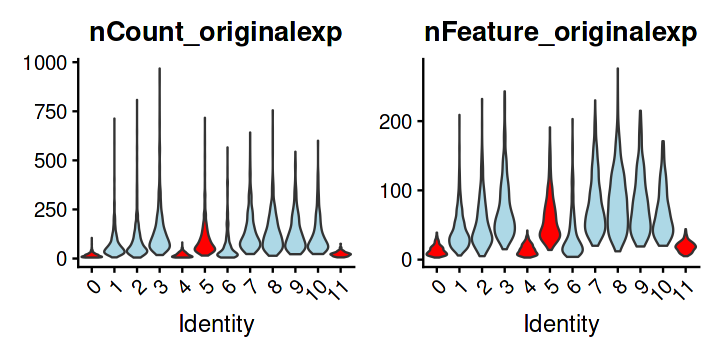

In [125]:
options(repr.plot.width=6, repr.plot.height=3)

#table(timepoint_pre_QC$E6.5@meta.data$seurat_clusters, timepoint_pre_QC$E6.5@meta.data$passed_QC)

# Determine the number of clusters
num_clusters <- length(levels(timepoint_pre_QC$E6.5@active.ident))

# Initialize cluster colors as all blue
cluster_colors <- rep("lightblue", num_clusters)
names(cluster_colors) <- levels(timepoint_pre_QC$E6.5@active.ident)

# Set specific clusters to red
cluster_colors[c("0", "4", "5", "11")] <- "red"

# Plot with specific cluster coloring
p1 <- VlnPlot(timepoint_pre_QC$E6.5, 
        features = "nCount_originalexp",
        pt.size = 0) + theme(legend.position = "none") + scale_fill_manual(values = cluster_colors)

p2 <- VlnPlot(timepoint_pre_QC$E6.5, 
        features = "nFeature_originalexp",
        pt.size = 0) + theme(legend.position = "none") + scale_fill_manual(values = cluster_colors)

p1 | p2

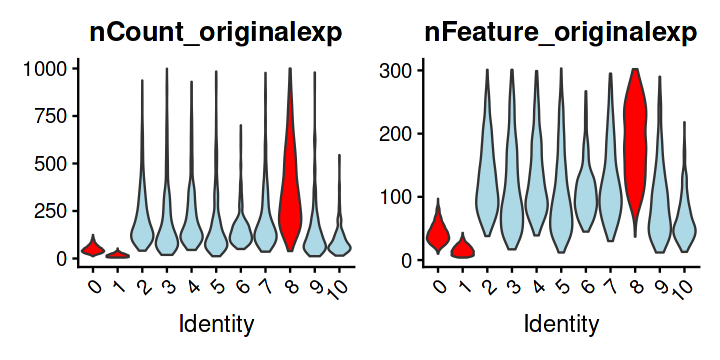

In [124]:
options(repr.plot.width=6, repr.plot.height=3)

#table(timepoint_pre_QC$E7.5@meta.data$seurat_clusters, timepoint_pre_QC$E7.5@meta.data$passed_QC)

# Determine the number of clusters
num_clusters <- length(levels(timepoint_pre_QC$E7.5@active.ident))

# Initialize cluster colors as all blue
cluster_colors <- rep("lightblue", num_clusters)
names(cluster_colors) <- levels(timepoint_pre_QC$E7.5@active.ident)

# Set specific clusters to red
cluster_colors[c("0", "1", "8")] <- "red"

# Plot with specific cluster coloring
p1 <- VlnPlot(timepoint_pre_QC$E7.5, 
        features = "nCount_originalexp",
        pt.size = 0) + theme(legend.position = "none") + scale_fill_manual(values = cluster_colors)

p2 <- VlnPlot(timepoint_pre_QC$E7.5, 
        features = "nFeature_originalexp",
        pt.size = 0) + theme(legend.position = "none") + scale_fill_manual(values = cluster_colors)

p1 | p2

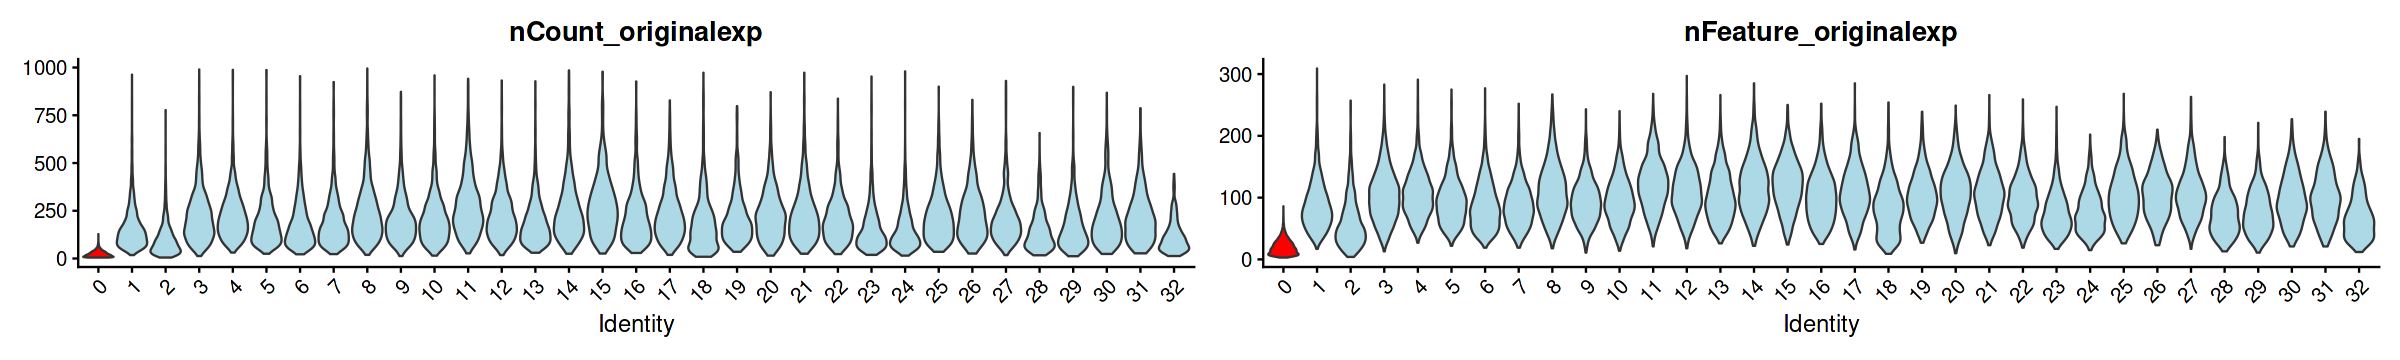

In [123]:
options(repr.plot.width=20, repr.plot.height=3)

#table(timepoint_pre_QC$E8.5@meta.data$seurat_clusters, timepoint_pre_QC$E8.5@meta.data$passed_QC)

# Determine the number of clusters
num_clusters <- length(levels(timepoint_pre_QC$E8.5@active.ident))

# Initialize cluster colors as all blue
cluster_colors <- rep("lightblue", num_clusters)
names(cluster_colors) <- levels(timepoint_pre_QC$E8.5@active.ident)

# Set specific clusters to red
cluster_colors[c("0")] <- "red"

# Plot with specific cluster coloring
p1 <- VlnPlot(timepoint_pre_QC$E8.5, 
        features = "nCount_originalexp",
        pt.size = 0) + theme(legend.position = "none") + scale_fill_manual(values = cluster_colors)

p2 <- VlnPlot(timepoint_pre_QC$E8.5, 
        features = "nFeature_originalexp",
        pt.size = 0) + theme(legend.position = "none") + scale_fill_manual(values = cluster_colors)

p1 | p2

## Find the Marker Genes for the Clusters in the Different Object

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from shila_umap_ to shilaumap_”


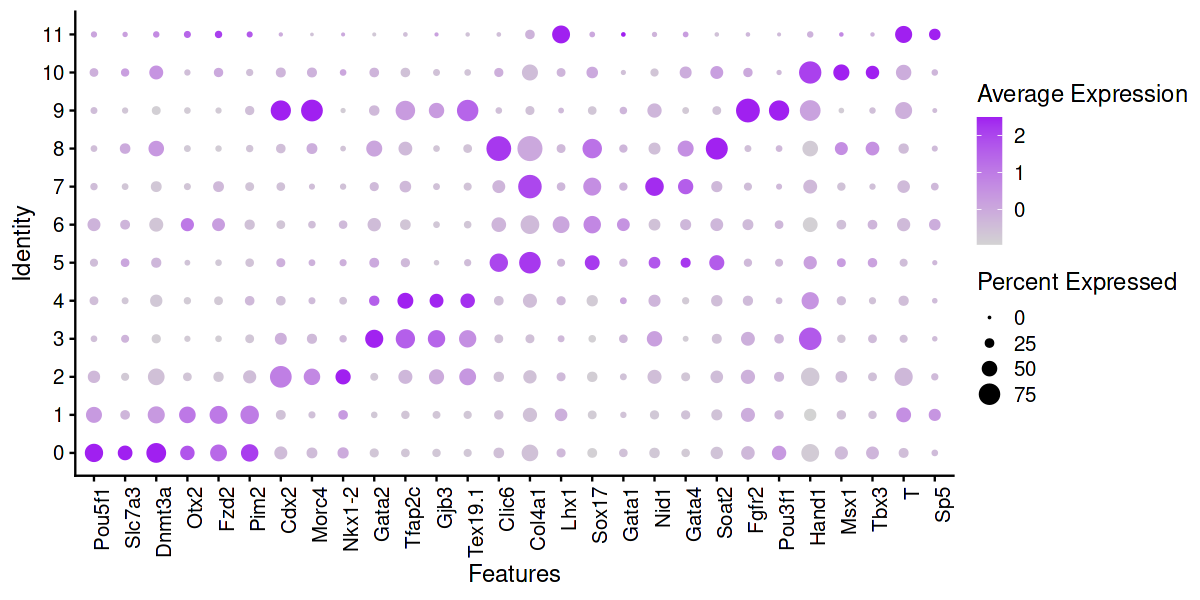

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



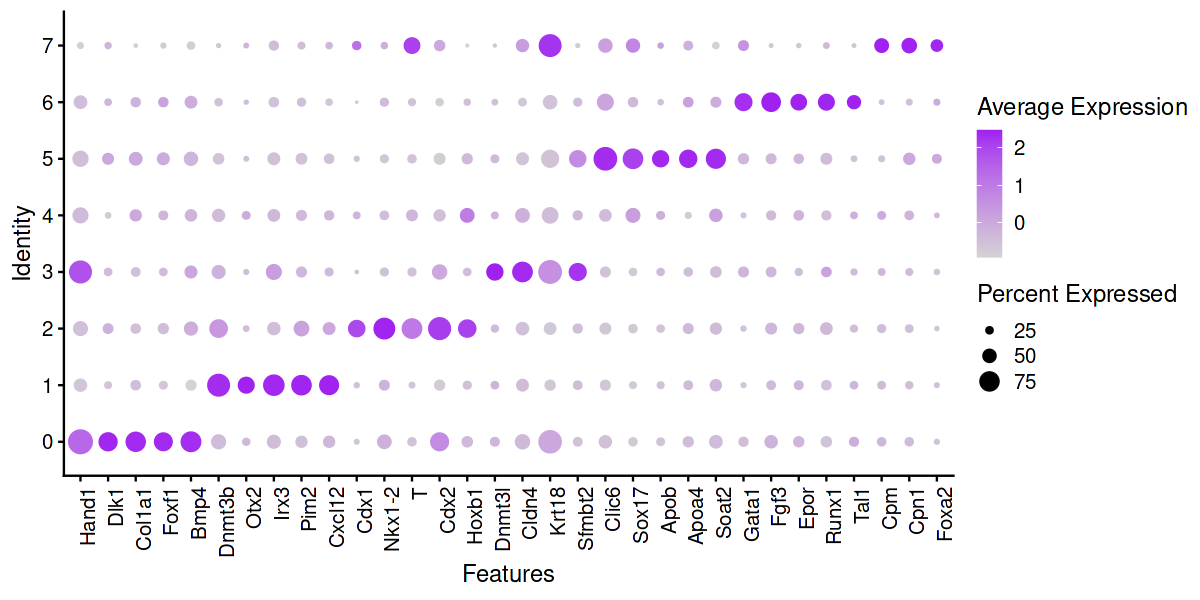

In [133]:
object <- timepoint_post_QC$E7.5
DefaultAssay(object) <- "originalexp"
markers <- FindAllMarkers(
                                  object,
                                  assay = "originalexp",
                                  features = rownames(object),
                                  slot = "data")

post_QC_E7.5_markers <- markers

markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 0.5) %>%
    slice_head(n = 5) %>%
    ungroup() -> top_markers



options(repr.plot.width=10, repr.plot.height=5)
DotPlot(object = object, 
        features = unique(c(top_markers$gene)),
        cols = c("lightgrey", "purple"),
        dot.min = 0) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 30

Calculating cluster 31

Calculating cluster 32



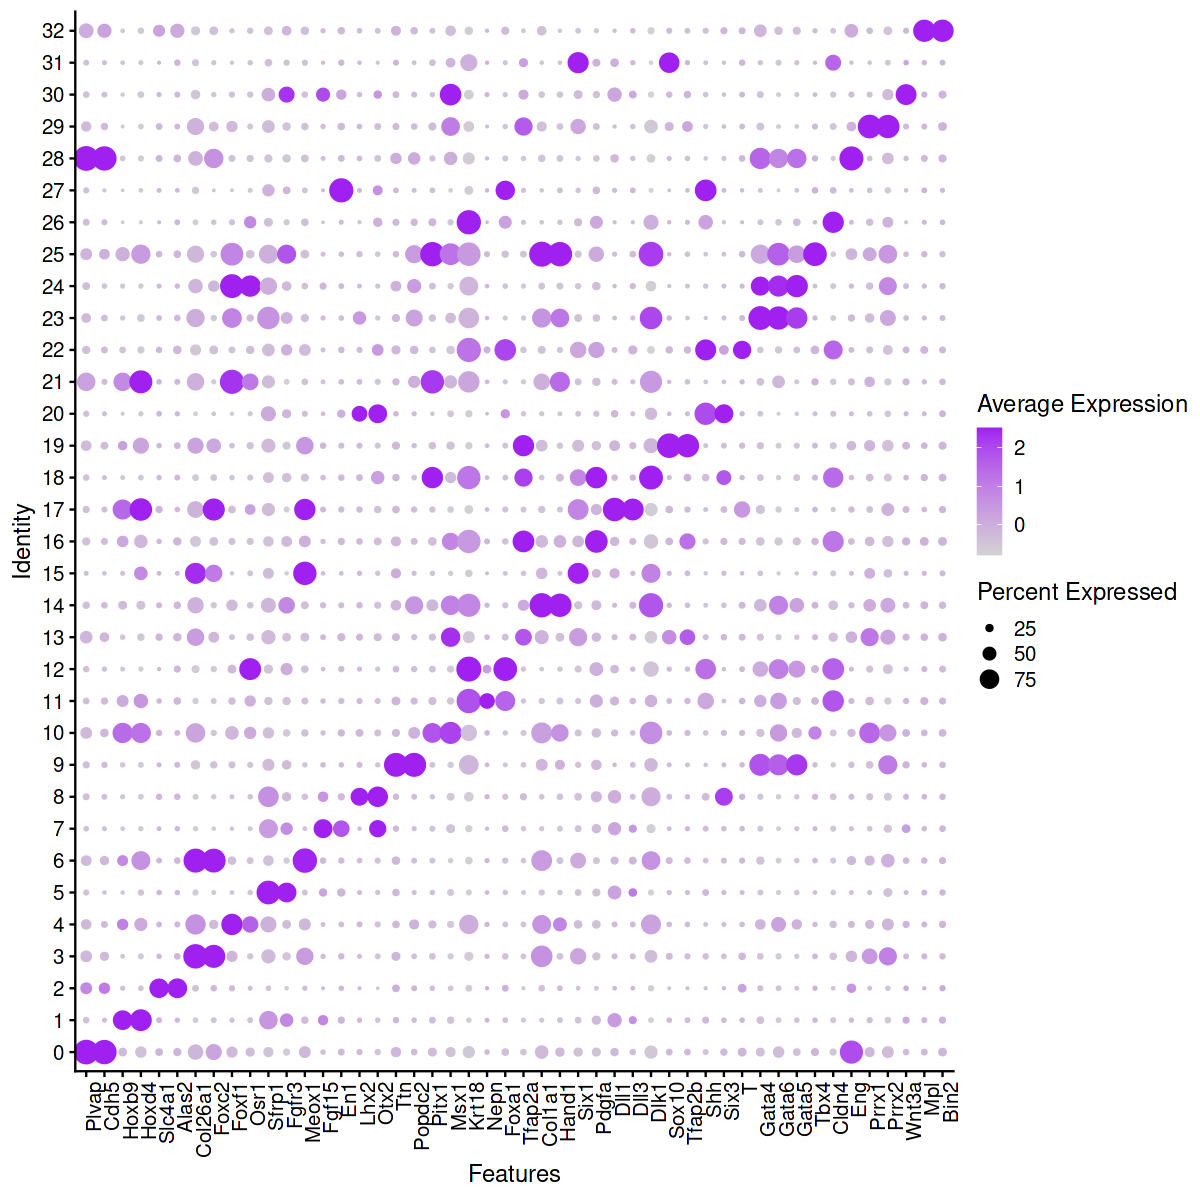

In [134]:
object <- timepoint_post_QC$E8.5
DefaultAssay(object) <- "originalexp"
markers <- FindAllMarkers(
                                  object,
                                  assay = "originalexp",
                                  features = rownames(object),
                                  slot = "data")

post_QC_E8.5_markers <- markers

markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 0.5) %>%
    slice_head(n = 2) %>%
    ungroup() -> top_markers

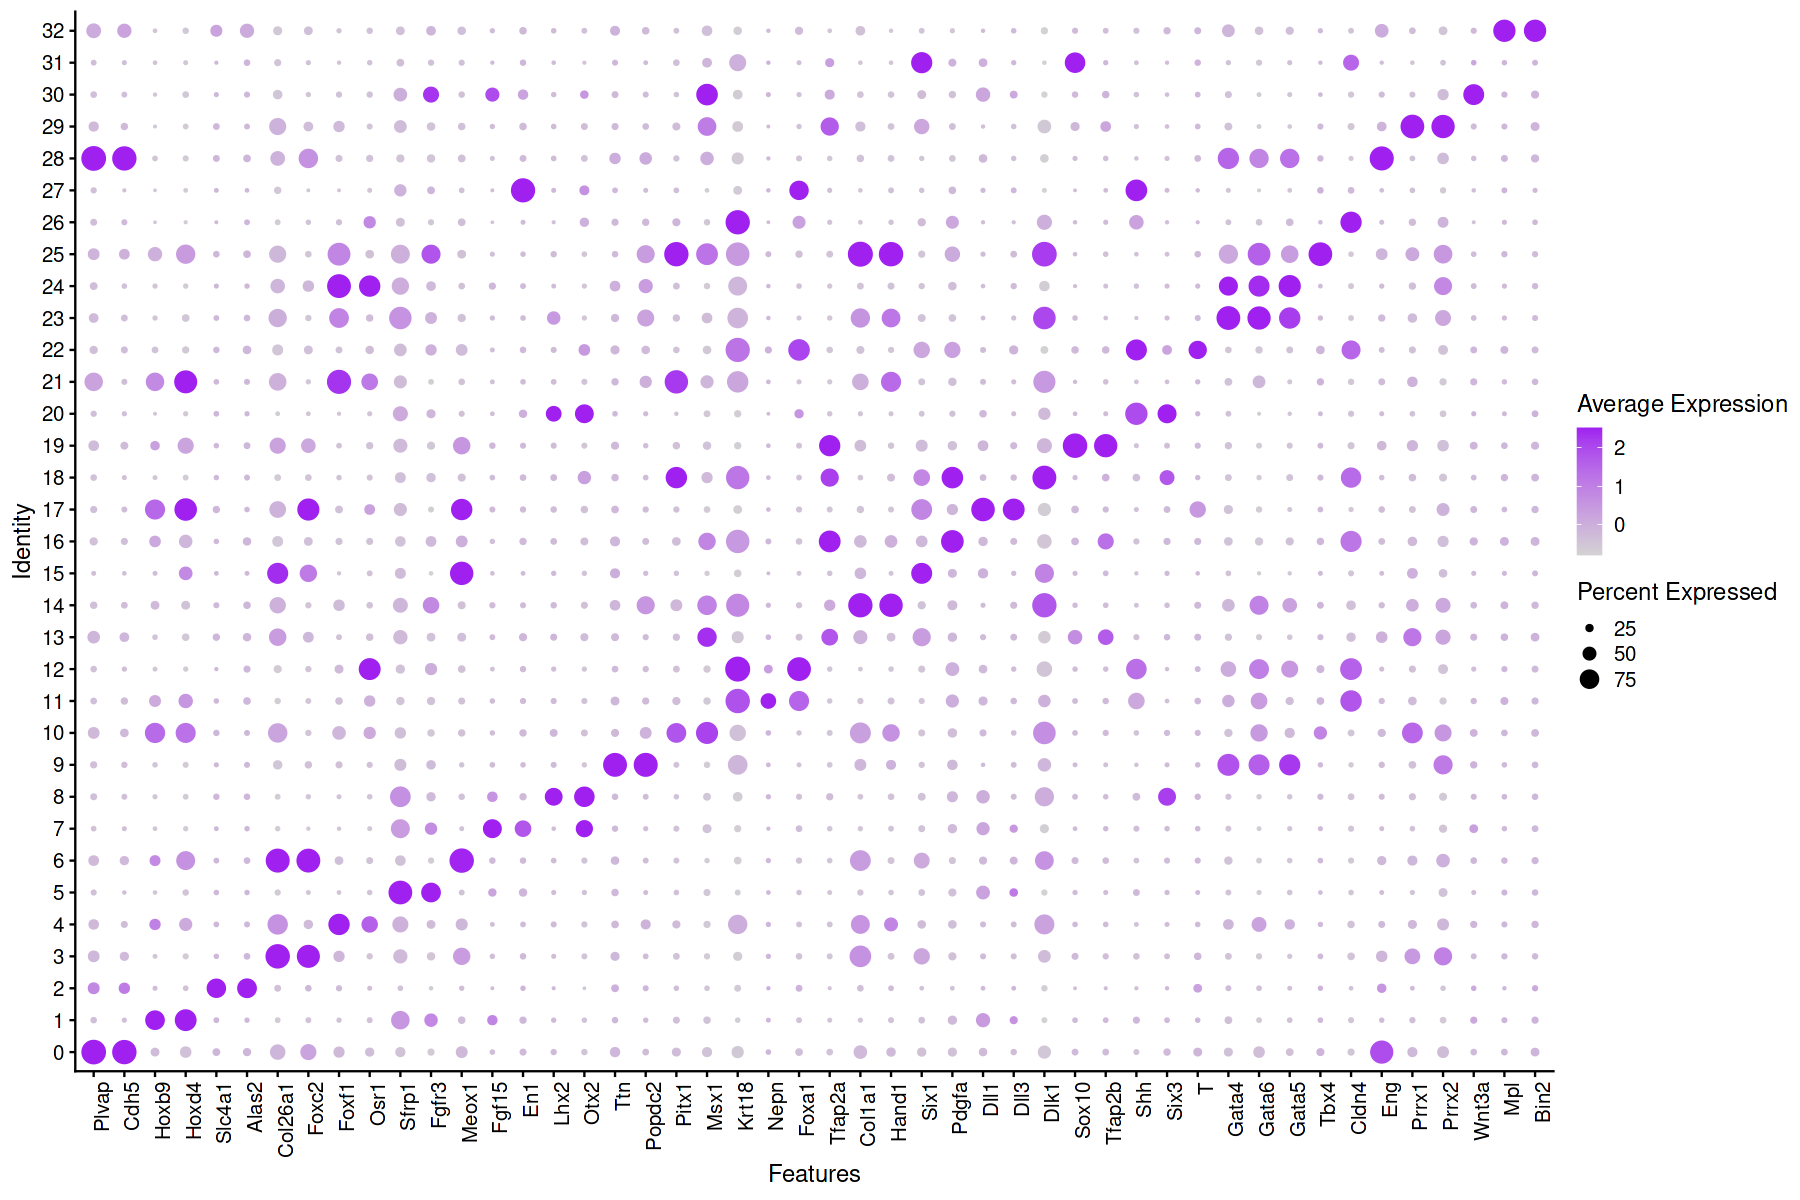

In [135]:
options(repr.plot.width=15, repr.plot.height=10)
DotPlot(object = object, 
        features = unique(c(top_markers$gene)),
        cols = c("lightgrey", "purple"),
        dot.min = 0) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15



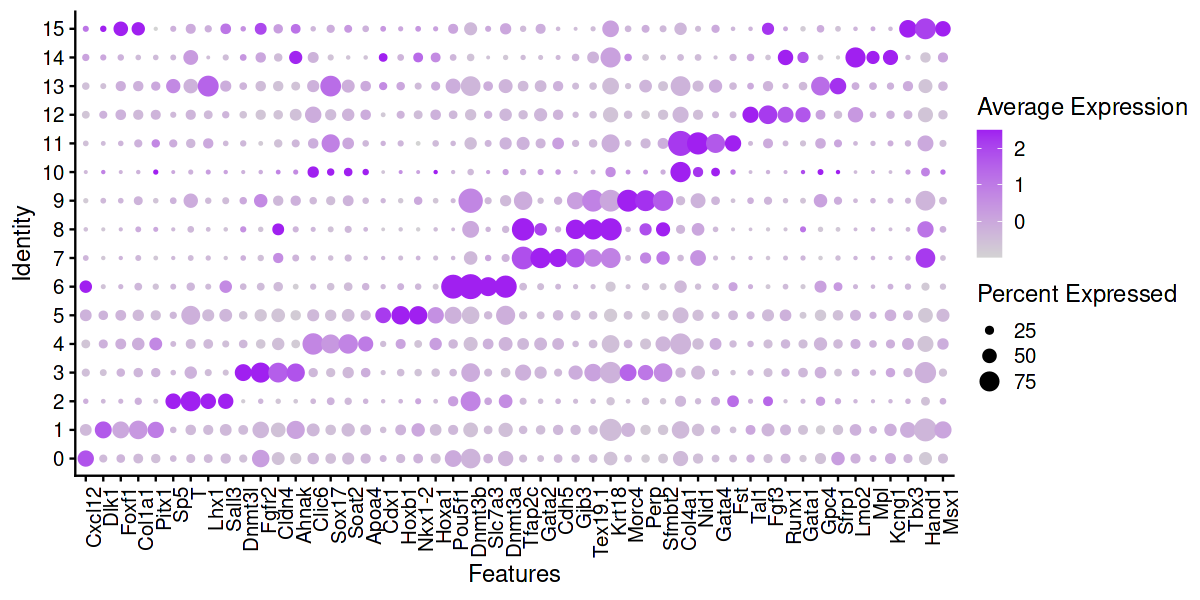

In [141]:
object <- post_QC_early_embryos_ONLY
DefaultAssay(object) <- "originalexp"
markers <- FindAllMarkers(
                                  object,
                                  assay = "originalexp",
                                  features = rownames(object),
                                  slot = "data")
post_QC_E6.5_and_E7.5_markers <- markers

markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 0.5) %>%
    slice_head(n = 4) %>%
    ungroup() -> top_markers


options(repr.plot.width=10, repr.plot.height=5)
DotPlot(object = object, 
        features = unique(c(top_markers$gene)),
        cols = c("lightgrey", "purple"),
        dot.min = 0) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

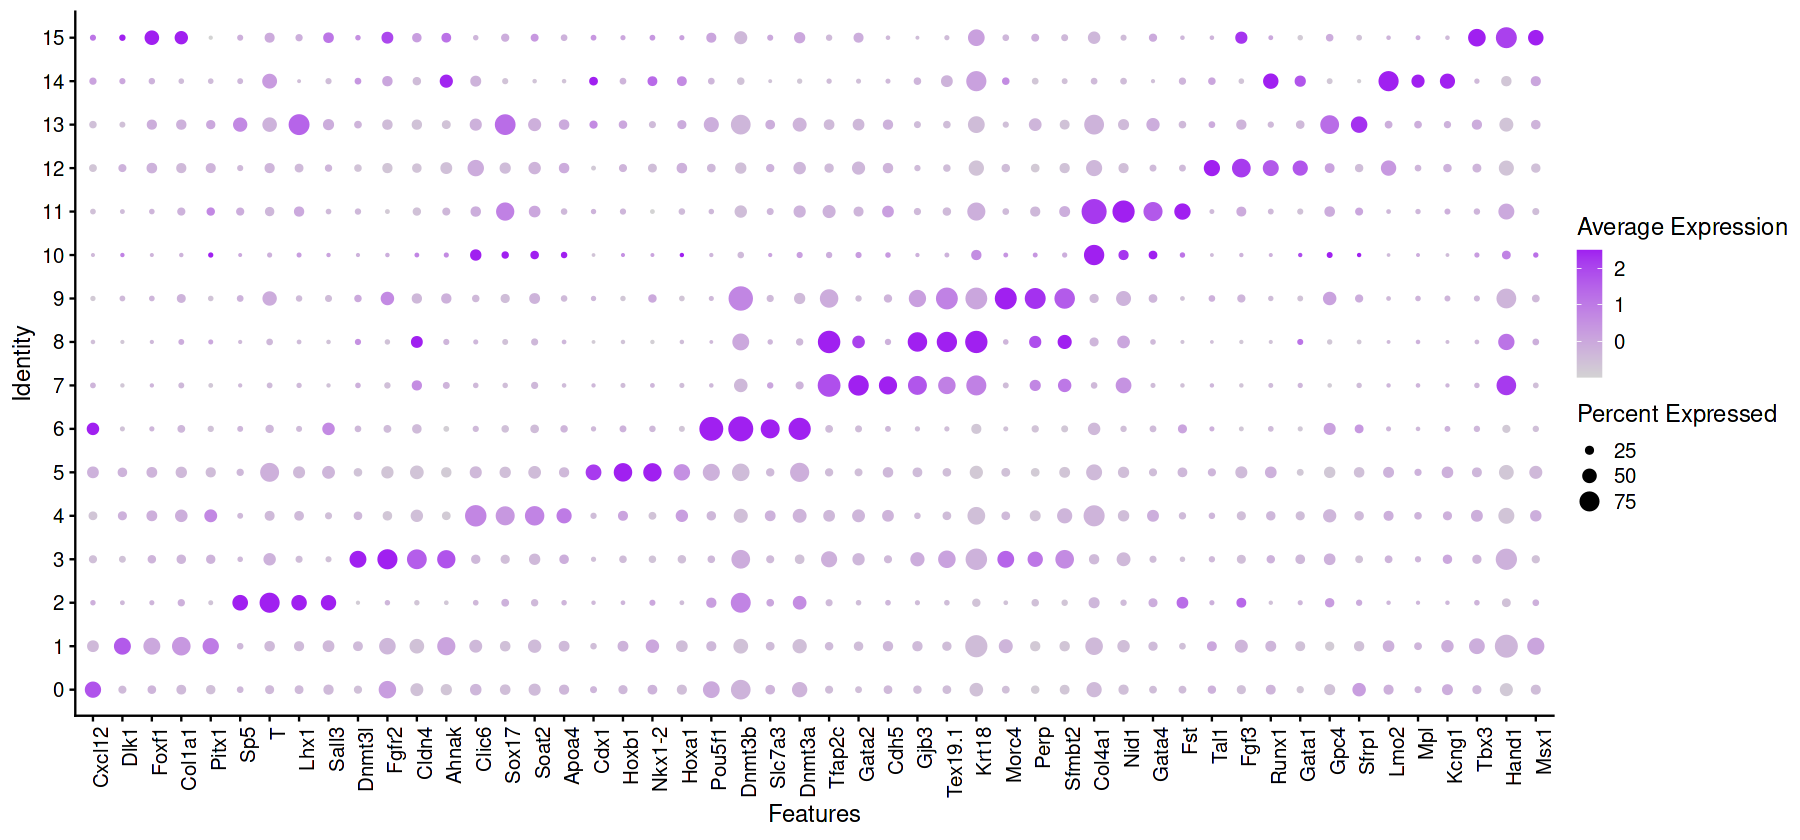

In [142]:
options(repr.plot.width=15, repr.plot.height=7)
DotPlot(object = object, 
        features = unique(c(top_markers$gene)),
        cols = c("lightgrey", "purple"),
        dot.min = 0) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

## Explore spatial location of the clusters

In [143]:
post_QC_early_embryos_ONLY

An object of class Seurat 
1053 features across 9237 samples within 3 assays 
Active assay: across_timepoint_integration (351 features, 351 variable features)
 2 other assays present: originalexp, within_timepoint_integration
 2 dimensional reductions calculated: pca, umap

In [146]:
seqFISH_postQC[,seqFISH_postQC@meta.data$Estage %in% c("E6.5", "E7.5")][["spatial"]]

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from shila_umap_ to shilaumap_”


In [147]:
post_QC_early_embryos_ONLY[["spatial"]] <- seqFISH_postQC[,seqFISH_postQC@meta.data$Estage %in% c("E6.5", "E7.5")][["spatial"]]

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from shila_umap_ to shilaumap_”


In [148]:
post_QC_early_embryos_ONLY

An object of class Seurat 
1053 features across 9237 samples within 3 assays 
Active assay: across_timepoint_integration (351 features, 351 variable features)
 2 other assays present: originalexp, within_timepoint_integration
 3 dimensional reductions calculated: pca, umap, spatial

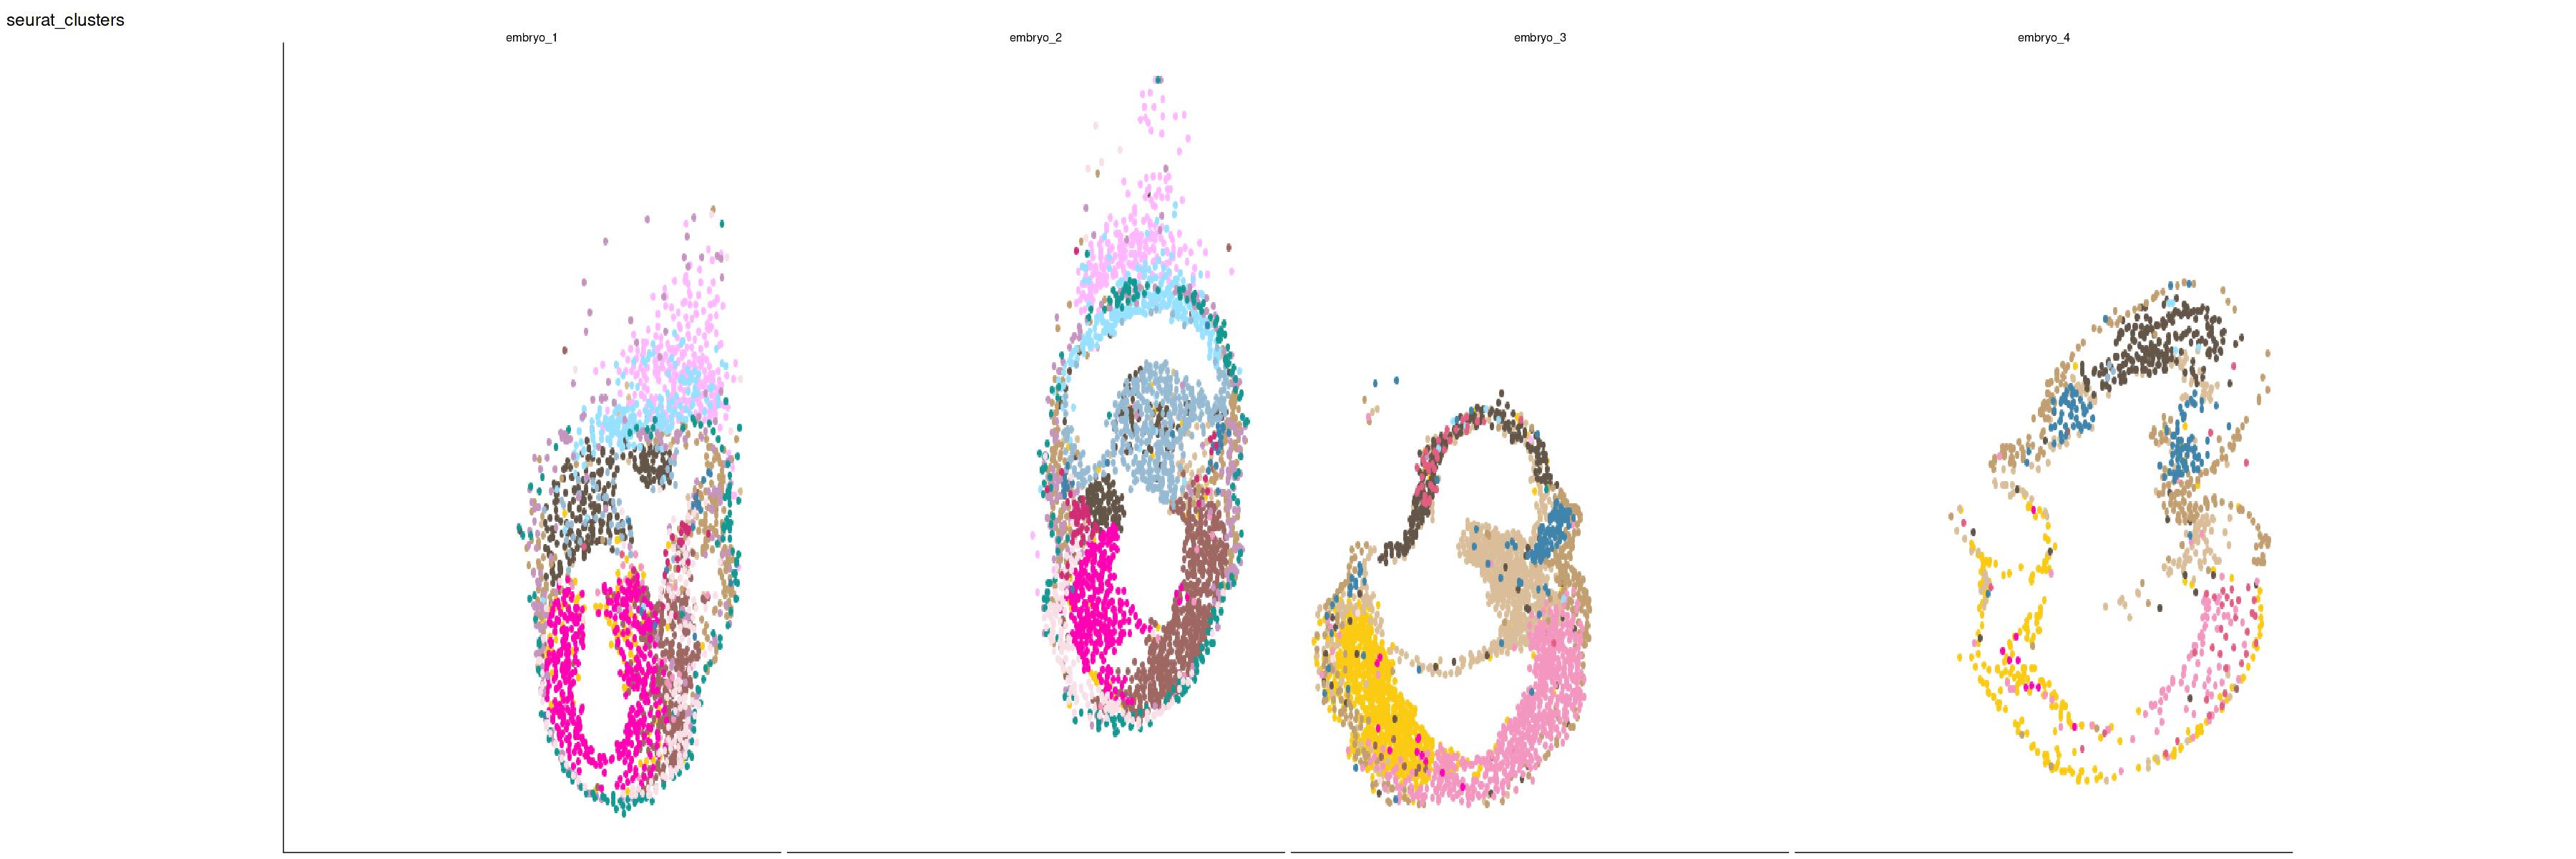

In [151]:
options(repr.plot.width=30, repr.plot.height=10)

pt_size <- 2
p4 <- DimPlot(post_QC_early_embryos_ONLY, 
              reduction = "spatial",
              group.by = "seurat_clusters",
              split.by = "embryo_name_updated",
              order = TRUE,
              raster = TRUE,
        pt.size = pt_size) +
      scale_color_manual(values = seurat_colors) +
      theme_void() +
      coord_fixed() +
      theme(text = element_text(family = "Helvetica", size = 12),  # Set font family and size
            legend.position = "none",
            axis.line = element_line(color = "black",  size = 0.3))

p4

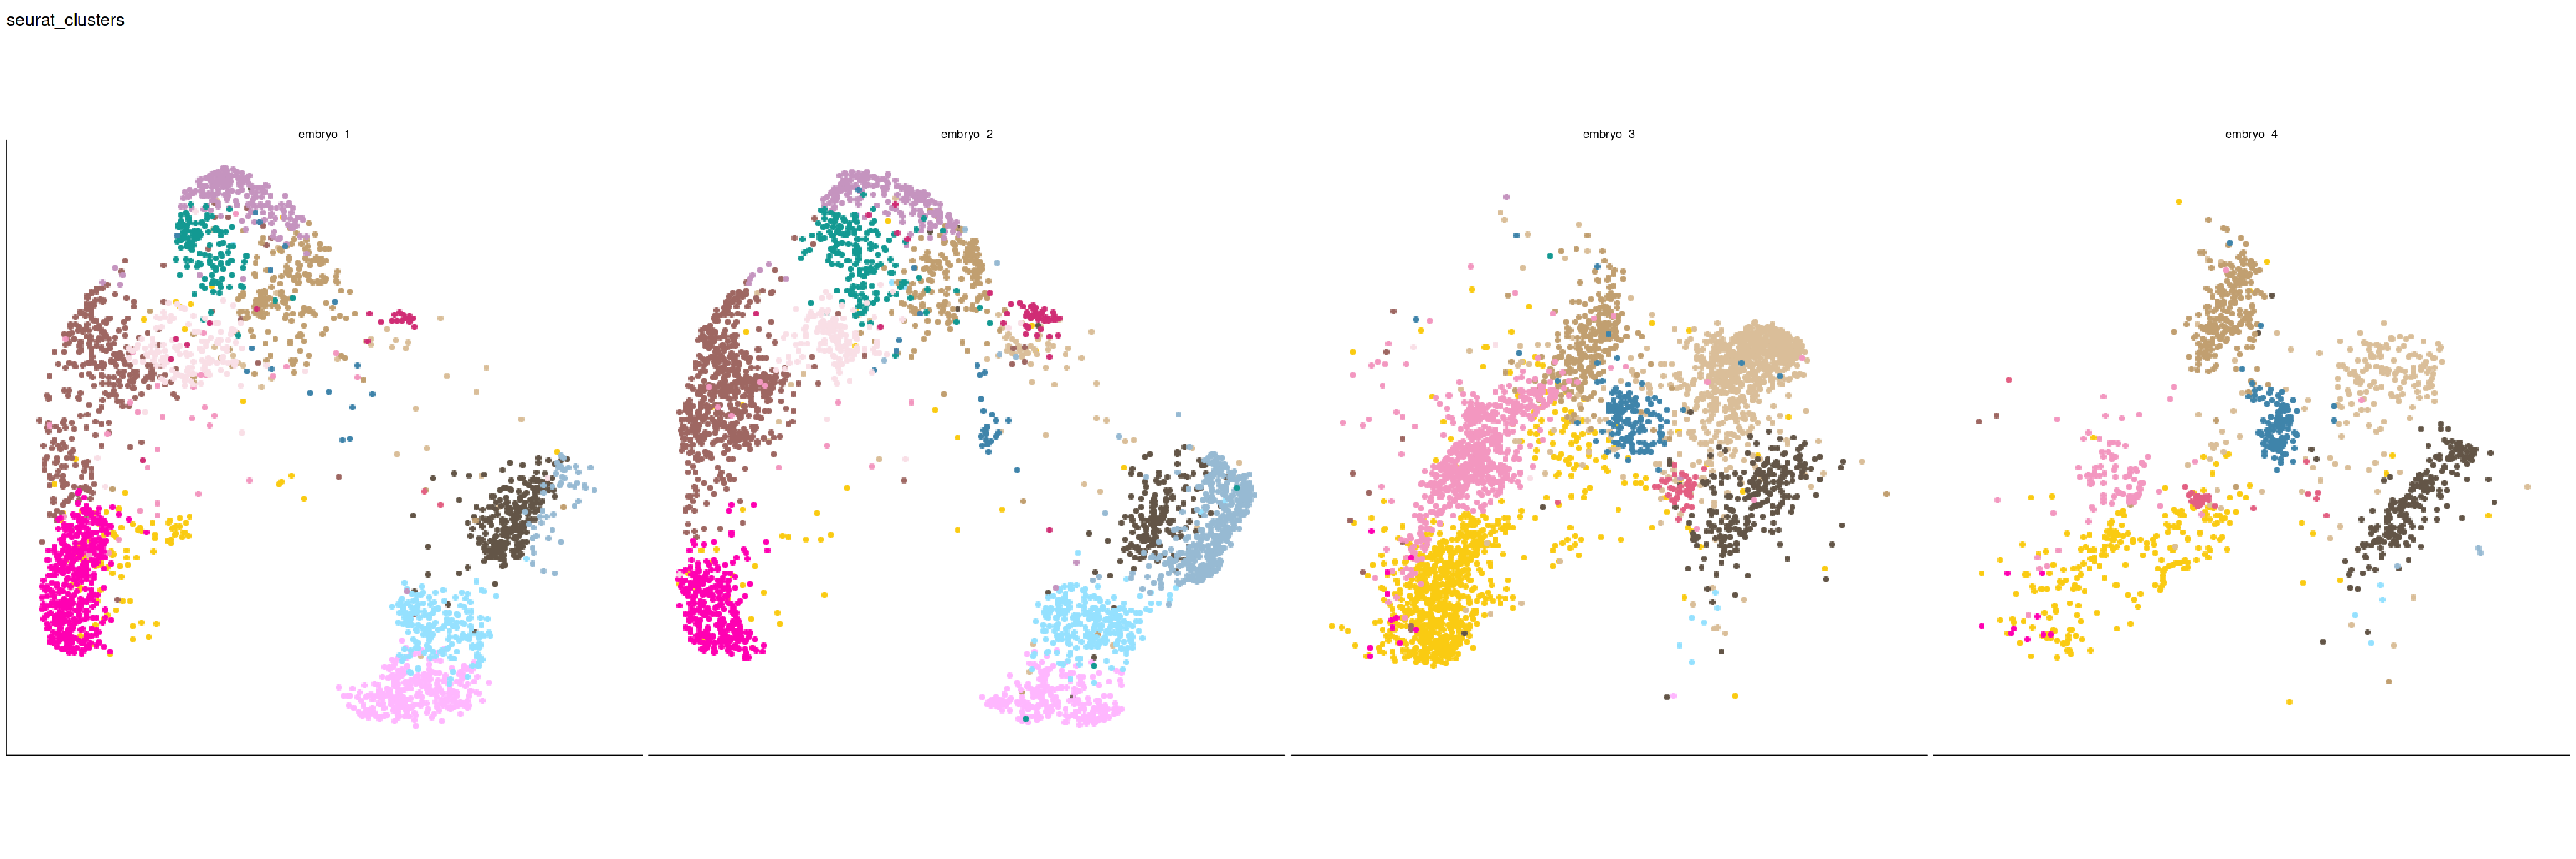

In [152]:
options(repr.plot.width=30, repr.plot.height=10)

pt_size <- 2
p4 <- DimPlot(post_QC_early_embryos_ONLY, 
              reduction = "umap",
              group.by = "seurat_clusters",
              split.by = "embryo_name_updated",
              order = TRUE,
              raster = TRUE,
        pt.size = pt_size) +
      scale_color_manual(values = seurat_colors) +
      theme_void() +
      coord_fixed() +
      theme(text = element_text(family = "Helvetica", size = 12),  # Set font family and size
            legend.position = "none",
            axis.line = element_line(color = "black",  size = 0.3))

p4